# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [37]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [38]:
# Your code here
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load the iris dataset
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

# Define the alpha_func
def alpha_func(D, idx):
    sepal_width_col = 'Sepal.Width'
    sepal_length_col = 'Sepal.Length'
    
    if sepal_width_col not in D.columns or sepal_length_col not in D.columns:
        raise KeyError(f"The DataFrame does not contain '{sepal_width_col}' or '{sepal_length_col}' columns.")
    
    alpha_values = []
    for i in idx:
        sepal_width = D.loc[i, sepal_width_col]
        sepal_length = D.loc[i, sepal_length_col]
        alpha = sepal_width / sepal_length
        alpha_values.append(alpha)
    
    return alpha_values


Test the code below

In [39]:
alpha_func(df, range(100))

[0.6862745098039216,
 0.6122448979591836,
 0.6808510638297872,
 0.673913043478261,
 0.72,
 0.7222222222222222,
 0.7391304347826088,
 0.6799999999999999,
 0.6590909090909091,
 0.6326530612244897,
 0.6851851851851851,
 0.7083333333333334,
 0.625,
 0.6976744186046512,
 0.6896551724137931,
 0.7719298245614036,
 0.7222222222222222,
 0.6862745098039216,
 0.6666666666666666,
 0.7450980392156863,
 0.6296296296296295,
 0.7254901960784315,
 0.782608695652174,
 0.6470588235294118,
 0.7083333333333334,
 0.6,
 0.6799999999999999,
 0.673076923076923,
 0.6538461538461539,
 0.6808510638297872,
 0.6458333333333334,
 0.6296296296296295,
 0.7884615384615383,
 0.7636363636363637,
 0.6326530612244897,
 0.64,
 0.6363636363636364,
 0.7346938775510203,
 0.6818181818181818,
 0.6666666666666667,
 0.7,
 0.5111111111111111,
 0.7272727272727273,
 0.7,
 0.7450980392156863,
 0.625,
 0.7450980392156863,
 0.6956521739130436,
 0.6981132075471699,
 0.6599999999999999,
 0.4571428571428572,
 0.5,
 0.4492753623188406,
 0.4

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [40]:
def bootstrap_sample(D):
    bootstrap_indices = np.random.choice(D.index, size=len(D), replace=True)
    bootstrap_data = D.loc[bootstrap_indices].reset_index(drop=True)
    return bootstrap_data

# Create a bootstrap sample
bootstrap_df = bootstrap_sample(df)

# Recompute alpha for the bootstrap sample
bootstrap_alpha_values = alpha_func(bootstrap_df, range(len(bootstrap_df)))


Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

Calculating the mean of Sepal.Length provides a single point estimate of the average sepal length. However, this estimate does not convey any information about the variability or uncertainty associated with it. 

Boostrap is advantage because  allows us to: 
- estimate the variability of the sample mean by generating multiple bootstrap samples and calculating the mean for each sample.
- It enables us to construct confidence intervals for the mean, providing a range of plausible values for the population mean
- estimating the standard error of the mean, which indicates the reliability of the sample mean.
- data distribution: we can gain insight into the underlying data distribution.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [41]:
# Add your code here to set the seed
def boot_SE(data, num_bootstrap_samples=1000, random_seed=0):
    np.random.seed(random_seed)  # Set the seed for reproducibility
    bootstrap_means = []
    
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)
    
    bootstrap_means = np.array(bootstrap_means)
    standard_error = np.std(bootstrap_means, ddof=1)
    
    return standard_error

# Evaluate the accuracy of alpha estimate
alpha_values = alpha_func(df, range(len(df)))
bootstrap_standard_error_alpha = boot_SE(alpha_values, num_bootstrap_samples=1000, random_seed=0)
print(f"Bootstrap Standard Error for Alpha: {bootstrap_standard_error_alpha}")


Bootstrap Standard Error for Alpha: 0.009253629333099573


_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [42]:
# Your code here
def boot_SE(data, num_bootstrap_samples=1000, random_seed=0):
    np.random.seed(random_seed)  # Set the seed for reproducibility
    bootstrap_means = []
    
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)
    
    bootstrap_means = np.array(bootstrap_means)
    standard_error = np.std(bootstrap_means, ddof=1)
    
    return standard_error

# Evaluate the accuracy of alpha estimate
alpha_values = alpha_func(df, range(len(df)))
bootstrap_standard_error_alpha = boot_SE(alpha_values, num_bootstrap_samples=1000, random_seed=0)
print(f"Bootstrap Standard Error for Alpha: {bootstrap_standard_error_alpha}")


Bootstrap Standard Error for Alpha: 0.009253629333099573


_(vi)_ What is the original mean value of `Sepal.Length`?

In [43]:
# Your code here
original_mean_sepal_length = df['Sepal.Length'].mean()
print(f"Original Mean Value of Sepal.Length: {original_mean_sepal_length}")


Original Mean Value of Sepal.Length: 5.843333333333334


Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [44]:
# Add your code here
# Generate bootstrapped samples for Sepal.Length
sepal_lengths = df['Sepal.Length'].values
boot_se_samples = bootstrap_samples(sepal_lengths, num_bootstrap_samples=1000, random_seed=0)

# Calculate the bootstrapped mean and standard deviation
bootstrapped_means = boot_se_samples.mean(axis=1)
bootstrapped_mean = bootstrapped_means.mean()
bootstrapped_std = bootstrapped_means.std(ddof=1)

# Compute the 95% confidence intervals for the bootstrapped means
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)

print(f"95% Confidence Interval for Sepal.Length Mean: ({lower_bound}, {upper_bound})")


95% Confidence Interval for Sepal.Length Mean: (5.7166500000000005, 5.9719999999999995)


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

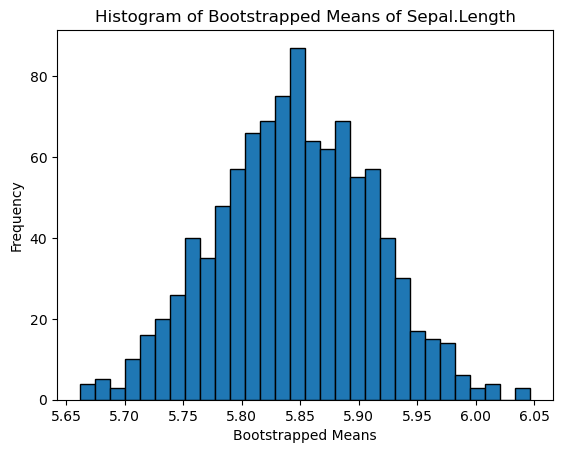

In [45]:
# Add your code here
import matplotlib.pyplot as plt

# Create a figure and axis for the histogram
fig, ax = plt.subplots()

# Create the histogram
ax.hist(bootstrapped_means, bins=30, edgecolor='black')

# Add a title
ax.set_title('Histogram of Bootstrapped Means of Sepal.Length')

# Add a label to the x-axis
ax.set_xlabel('Bootstrapped Means')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

In [ ]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here

# Add a title
#Add your code here

# Add a label to the x-axis
#Add your code here

# Add a label to the y-axis
#Add your code here

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
# Write your answer here
'''Based on our analysis, we recommend planning for an average Sepal.Length of 5.8433 cm, with an upper bound consideration of 5.972 cm to account for variability. This ensures sufficient space for the irises during shipment, with a high degree of confidence in our estimates'''

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
